# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Pada tahun 2021 coin Ethereum menjadi sorotan oleh banyak orang. Hal ini dikarenakan harga coin tersebut semakin hari semakin tinggi. Selain itu, coin Ethereum juga bisa di mining dengan perangkat komputer yang sudah di modifikasi untuk melakukan proses mining coin tersebut. Hal ini membuat beberapa orang tertarik untuk melakukan investasi ke coin Ethereum. 

Namun sebelum melakukan investasi, kita perlu melakukan analisa terkait volume coin Ethereum di bulan Mei 2021 dan Juni 2021 agar keputusan investasi yang diambil tidak salah

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
#Mengambil data table dari situs coingecko
import requests
url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30' 
url_get = requests.get(url,  headers = { 'User-Agent': 'Popular browser\'s user-agent', })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
#Melihat isi dari link tersebut sebanyak 500 karakter dimulai dari awal
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
#Melakukan import library BeautifulSoup
#Kemudian menerapkan fitur BeautifulSoup ke link coingecko
from bs4 import BeautifulSoup 
soup = BeautifulSoup(url_get.content,"html.parser")

In [4]:
#Melihat isi dari url dengan lebih rapi
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
#Mengambil kata kunci untuk mendapatkan data table di url kemudian melakukan print untuk melihat pola
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


In [6]:
#Dari hasil print diatas, ditemukan bahwa data tanggal berada di class "font-semibold..."
#Kemudian melakukan percobaan find_all dengan atribute tersebut untuk mengambil data tanggal
test = table.find_all('th', attrs={'class':'font-semibold text-center'})[0].text
test

'2021-06-30'

In [7]:
#Setelah diketahui bahwa kata kunci untuk mengambil data tanggal sudah benar, maka 
#selanjutnya mencoba untuk menghitung row
row = table.find_all('th', attrs={'class':'font-semibold text-center'})
row_length = len(row)
row_length

60

Do the scrapping process here (please change this markdown with your explanation)

In [8]:
#Membuat list kosong dengan nama temp
temp = [] 

#Melakukan pengulangan variable i dimulai dengan 0 sampai 60. Angka 60 diperoleh dari perhitungan
#jumlah data dari row_length yang sudah dilakukan sebelumnya
for i in range(0, row_length):

    #Mengambil data tanggal
    Date = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text
    
    #Mengambil data volume, namun dengan cara tertentu karena kata kunci yang digunakan oleh kolom
    #market cap, volume, open & close sama yaitu "text-center".
    #1 + i*4 adalah subsetting untuk mengambil angka volume saja
    volume = table.find_all('td', attrs={'class':'text-center'})[1 + i*4].text
    volume = volume.strip() #menghapus karakter blank
    
    #Menggabungkan data Date & volume dalam satu data frame
    temp.append((Date,volume))

#Menampilkan data Temp
temp

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
#Mengambil library pandas
import pandas as pd

#Memasukkan data temp ke dalam dataframe df
df = pd.DataFrame(temp, columns = ('Date','volume'))
df.head()

,Date,volume
0,2021-06-30,"$27,149,143,847"
1,2021-06-29,"$30,629,329,806"
2,2021-06-28,"$24,316,408,028"
3,2021-06-27,"$24,249,510,321"
4,2021-06-26,"$25,981,381,067"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d') #Mengubah menjadi format tanggal
df['volume'] = df['volume'].str.replace(",","") #Menghilangkan karakter koma
df['volume'] = df['volume'].str.replace("$","") #Menghilangkan karakter dollar
df['volume'] = df['volume'].astype('int64') #Mengubah menjadi type data integer

C:\Users\Febrianto\AppData\Local\Temp\ipykernel_7652\1357024947.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['volume'] = df['volume'].str.replace("$","") #Menghilangkan karakter dollar


In [11]:
#Memastikan bahwa format masing-masing kolom sudah sesuai
df.dtypes

Date      datetime64[ns]
volume             int64
dtype: object

In [12]:
#Mengubah kolom date menjadi index
df = df.set_index('Date')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='Date'>

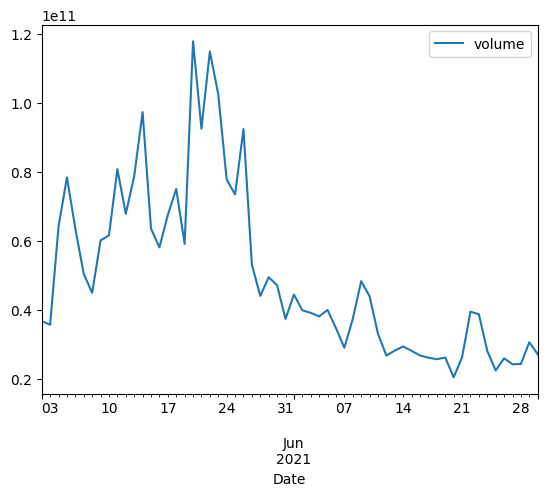

In [13]:
#Memvisualisasikan data ke dalam bentuk line chart
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

(Put your analysis and conclusion here.)
- Volume coin Ethereum pada bulan Mei 2021 cenderung lebih tinggi dibanding dengan bulan Juni 2021
- Volume coin Ethereum di bulan Juni 2021 cenderung menurun
- Volume coin Ethereum di bulan Mei 2021 sangat fluktuatif dibandingkan dengan bulan Juni 2021


### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.